In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

### Data loading
- to load raw dataset for analysis

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
# shows the first 5 rows of the DataFrame by default
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data exploration, analysis and pre-processing
- to view dataset shape, column names, data types
- to identify and handle nan, missing or duplicate values
- to know number of unique values in each column

In [4]:
# gives the summary of the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- Total number of entries = 8124
- Index of entries = 0 to 8123
- Target variable = class
- Total number of features = 22 (cap-shape, cap-surface, ...)
- All columns have 8124 non-null values (i.e no NAN or null values) which means no missing values are detected 

In [5]:
# checking for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

- there are no duplicate rows in the DataFrame

In [6]:
(df == '?').sum()
# the above expression finds how many cells in a DataFrame contain the string '?'.
# sum() function adds up the True values column-wise (by default), treating True as 1 and False as 0.
# the result is the series showing how many times '?' appears in each column 

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

- The column stalk-root contains 2480 entries with '?', which are missing values in disguise.
- While, all other columns contain 0 '?' values.
- Now replacing the '?' values of stalk-root column with 'unknown' values.

In [7]:
df['stalk-root'] = df['stalk-root'].replace('?', 'unknown')
(df == '?').sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# gives the statistical summary of all columns, in case of categorial data it gives count, unique, top (most frequent), freq
df.describe(include='all') 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
# shows the dimension of the DataFrame, there are 8124 rows and 23 columns
df.shape

(8124, 23)

In [10]:
# lists the names of all columns in the DataFrame
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
# getting unique values from each column
for col in df.columns:
    print(col,df[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' 'unknown']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


- so far we have found out that there are no NAN or null values and no duplicate rows in the DataFrame.
- we found out '?' in one of the column stalk-root which we replaced to 'unknown'
- we have found out the column names, their data types, and the number of unique values for each column.
- we found out that each column's data type is object, i.e. strings, and have several distinct values. 
- since, we have categorial data, we need to convert these strings to a numerical data type by encoding, either (label encoding or one-hot encoding) so that data can be understood by machine learning algorithms

### Univariate Analysis by visualizing data
- to understand how each individual feature is distributed

In [12]:
class_counts = df['class'].value_counts() # it counts the values of class
# in this case there are two types of data (e) and (p) with there total values
class_counts

class
e    4208
p    3916
Name: count, dtype: int64

#### Class Distribution
- Total samples: 8124
- Class 'e': 4208 samples (~51.8%)
- Class 'p': 3916 samples (~48.2%)

The dataset is almost balanced, with a difference of only 3.6% between the two classes. This slight imbalance is generally acceptable for most machine learning models.

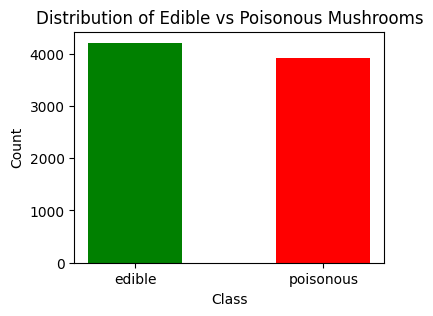

In [13]:
x = ['edible', 'poisonous']
y = class_counts.values

plt.figure(figsize=(4, 3)) # sets up figure size, the figure will be 4 inches wide and 3 inches tall
plt.bar(x=x, height=y, width=0.5, color=['green', 'red']) 
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('Class') # labels x-axis as 'Class'
plt.ylabel('Count') # labels y-axis as 'Count'
plt.show() # displays the plot on the screen.

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


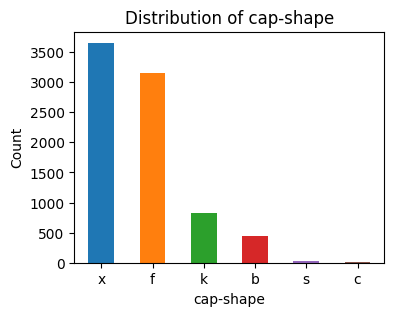

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64


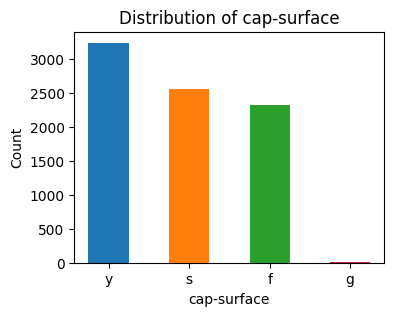

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


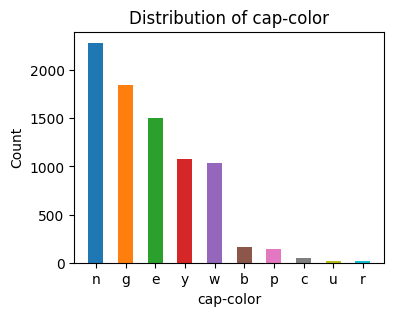

bruises
f    4748
t    3376
Name: count, dtype: int64


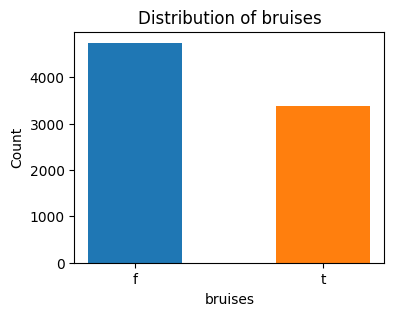

odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


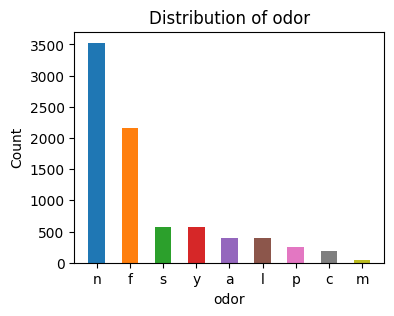

gill-attachment
f    7914
a     210
Name: count, dtype: int64


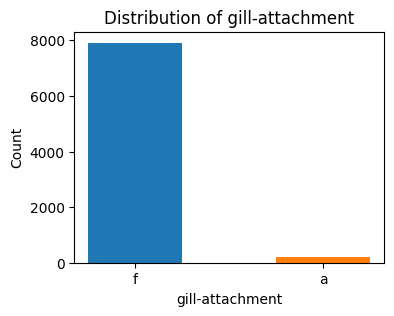

gill-spacing
c    6812
w    1312
Name: count, dtype: int64


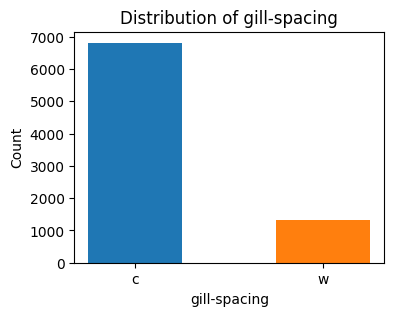

gill-size
b    5612
n    2512
Name: count, dtype: int64


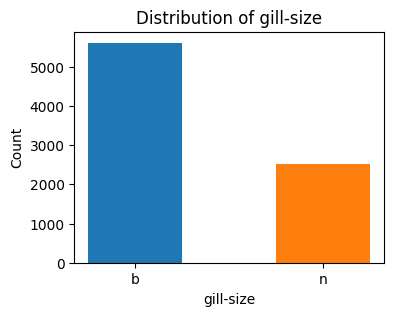

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64


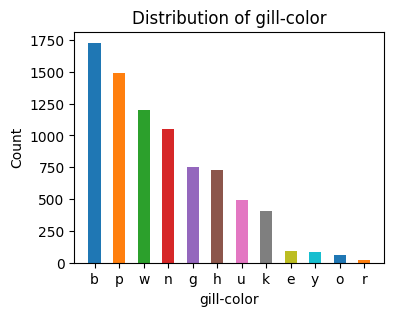

stalk-shape
t    4608
e    3516
Name: count, dtype: int64


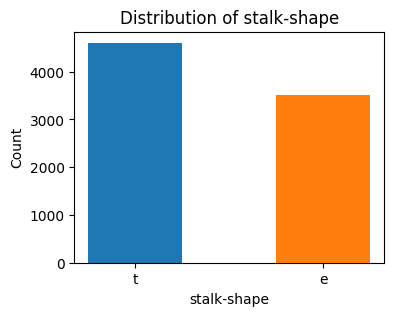

stalk-root
b          3776
unknown    2480
e          1120
c           556
r           192
Name: count, dtype: int64


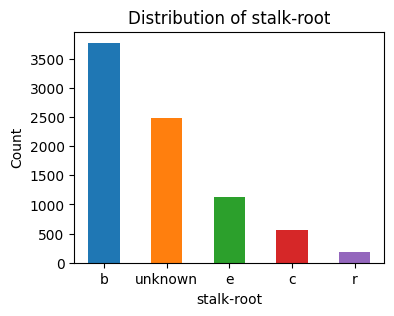

stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64


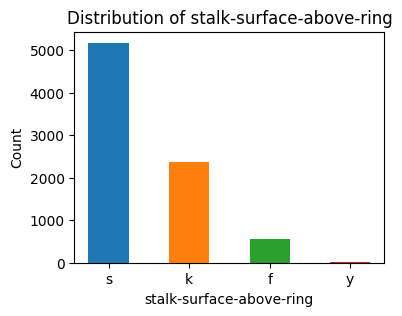

stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64


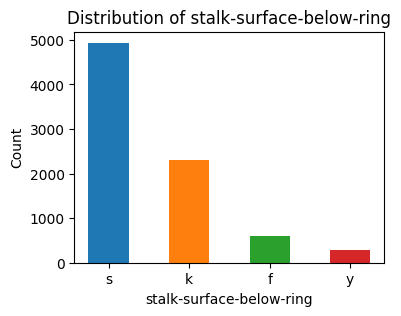

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64


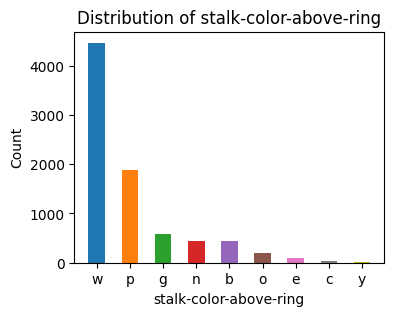

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64


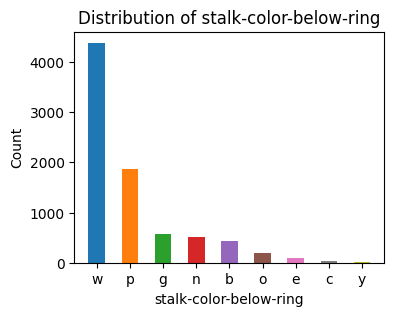

veil-type
p    8124
Name: count, dtype: int64


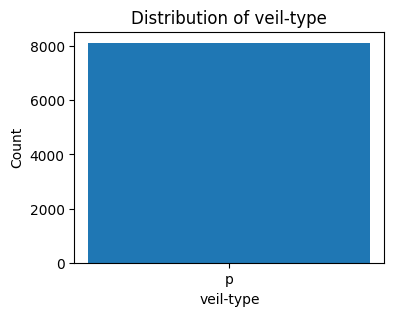

veil-color
w    7924
n      96
o      96
y       8
Name: count, dtype: int64


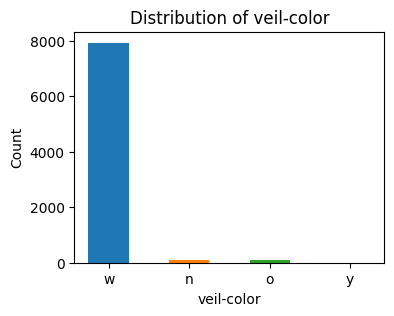

ring-number
o    7488
t     600
n      36
Name: count, dtype: int64


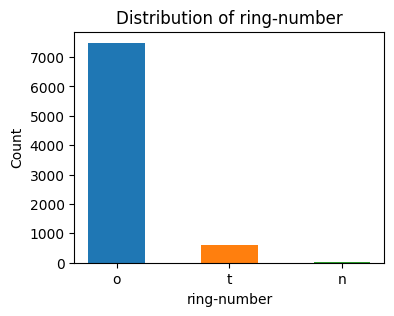

ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64


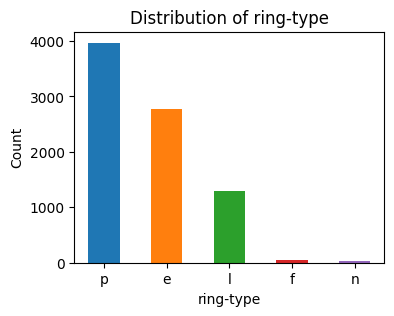

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64


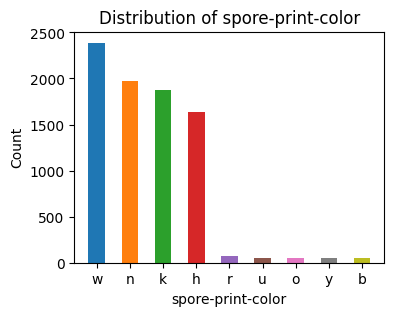

population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64


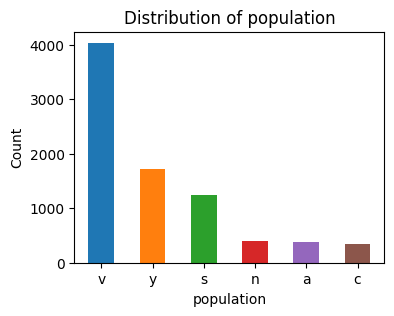

habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64


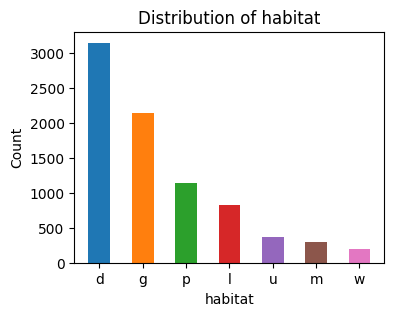

In [14]:
feature_cols = df.columns.drop('class') # it drops the column named 'class' and assigns it in variable named feature_cols

for col in feature_cols: # it iterates over each feature column
    value_counts = df[col].value_counts() # for each column counts how many times each unique value appears in the column and returns a series which includes index with its corresponding values
    x = value_counts.index.tolist() # converts the index of the value_counts (the unique values of the column) into a list eg: ['b', 'c', 'f', 'x']
    y = value_counts.values.tolist() # converts the values (counts of each unique value) into a list eg: [3000, 2500, 1500, 1000]

    plt.figure(figsize=(4,3))
    plt.bar(x=x, height=y, width=0.5, color=plt.cm.tab10.colors[:len(x)]) # applies a color to each bar. plt.cm.tab10.colors is a predefined color map (colormap) that provides vibrant, distinct colors. We slice it [:len(x)] to make sure that we only use as many colors as there are unique values in the current feature column.
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    print(value_counts), plt.show()

### Label Encoding
-  to convert categorial data to numerical data so that the data can be understood by machine learning algorithms

In [15]:
# creating a copy of the original DataFrame to avoid modifying the original df
df2 = df.copy()

In [16]:
# performing Label Encoding on each of the 23 columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each column
for col in df2.columns:
    df2[col] = le.fit_transform(df2[col])

In [17]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
# checking if label encoding worked
for col in df2.columns:
    print(col,df2[col].unique())

class [1 0]
cap-shape [5 0 4 2 3 1]
cap-surface [2 3 0 1]
cap-color [4 9 8 3 2 5 0 7 1 6]
bruises [1 0]
odor [6 0 3 5 2 1 8 7 4]
gill-attachment [1 0]
gill-spacing [0 1]
gill-size [1 0]
gill-color [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape [0 1]
stalk-root [2 1 0 3 4]
stalk-surface-above-ring [2 0 1 3]
stalk-surface-below-ring [2 0 3 1]
stalk-color-above-ring [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring [7 6 3 0 4 2 8 5 1]
veil-type [0]
veil-color [2 0 1 3]
ring-number [1 2 0]
ring-type [4 0 2 1 3]
spore-print-color [2 3 6 1 7 5 4 8 0]
population [3 2 0 4 5 1]
habitat [5 1 3 0 4 6 2]


### Independent and Dependent Split
- now we split the dataset into two distinct sets:
    - X (independent feature) -> which contains all the input features used to make predictions. These exclude the target feature ('class').
    - Y (dependent feature) -> which contains only the target feature ('class'), which we want the model to predict (eg: edible or poisonous).

In [19]:
# splitting dataset
X = df2.drop(['class'],axis=1)
Y = df2['class']

### Train-Test Split
- the dataset is split into two parts:
    - 80% for training the model (X_train, y_train)
    - 20% for testing the model's performance (X_test, y_test)

In [20]:
# creating train-test split using 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## `DecisionTreeClassifier`

#### Model Creation and Training

In [21]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

#### Prediction on test data

In [22]:
dt_predictions = dt_clf.predict(X_test)

#### Performance test using classification metrics

In [23]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, pos_label=1)
dt_recall = recall_score(y_test, dt_predictions, pos_label=1)
dt_f1 = f1_score(y_test, dt_predictions, pos_label=1)

print(f"Decision Tree Classifier Performance:")
print(f"Accuracy  : {dt_accuracy}")
print(f"Precision : {dt_precision}")
print(f"Recall    : {dt_recall}")
print(f"F1 Score  : {dt_f1}")

Decision Tree Classifier Performance:
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1 Score  : 1.0


## `RandomForestClassifier`

#### Model Creation and Training

In [24]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

#### Prediction on test data

In [25]:
rf_predictions = rf_clf.predict(X_test)

#### Performance test using classification metrics

In [26]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label=1)
rf_recall = recall_score(y_test, rf_predictions, pos_label=1)
rf_f1 = f1_score(y_test, rf_predictions, pos_label=1)

print(f"Random Forest Classifier Performance:")
print(f"Accuracy  : {rf_accuracy}")
print(f"Precision : {rf_precision}")
print(f"Recall    : {rf_recall}")
print(f"F1 Score  : {rf_f1}")

Random Forest Classifier Performance:
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1 Score  : 1.0


## `Gaussian Naive Bayes`

#### Model Creation and Training

In [27]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

#### Prediction on test data

In [28]:
nb_predictions = nb_clf.predict(X_test)

#### Performance test using classification metrics

In [29]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label=1)
nb_recall = recall_score(y_test, nb_predictions, pos_label=1)
nb_f1 = f1_score(y_test, nb_predictions, pos_label=1)

print(f"Naive Bayes Classifier Performance:")
print(f"Accuracy  : {nb_accuracy}")
print(f"Precision : {nb_precision}")
print(f"Recall    : {nb_recall}")
print(f"F1 Score  : {nb_f1}")

Naive Bayes Classifier Performance:
Accuracy  : 0.9286153846153846
Precision : 0.9280205655526992
Recall    : 0.9232736572890026
F1 Score  : 0.9256410256410257


## `K-Nearest Neighbors (KNN)`

#### Model Creation and Training

In [30]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

#### Prediction on test data

In [31]:
knn_predictions = knn_clf.predict(X_test)

#### Performance test using classification metrics

In [32]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, pos_label=1)
knn_recall = recall_score(y_test, knn_predictions, pos_label=1)
knn_f1 = f1_score(y_test, knn_predictions, pos_label=1)

print(f"K-Nearest Neighbors Performance:")
print(f"Accuracy  : {knn_accuracy}")
print(f"Precision : {knn_precision}")
print(f"Recall    : {knn_recall}")
print(f"F1 Score  : {knn_f1}")

K-Nearest Neighbors Performance:
Accuracy  : 0.9963076923076923
Precision : 0.9923857868020305
Recall    : 1.0
F1 Score  : 0.9961783439490446


## `Support Vector Classifier (SVC)`

#### Model Creation and Training

In [33]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

#### Prediction on test data

In [34]:
svc_predictions = svc_clf.predict(X_test)

#### Performance test using classification metrics

In [35]:
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions, pos_label=1)
svc_recall = recall_score(y_test, svc_predictions, pos_label=1)
svc_f1 = f1_score(y_test, svc_predictions, pos_label=1)

print(f"Support Vector Classifier Performance:")
print(f"Accuracy  : {svc_accuracy}")
print(f"Precision : {svc_precision}")
print(f"Recall    : {svc_recall}")
print(f"F1 Score  : {svc_f1}")

Support Vector Classifier Performance:
Accuracy  : 0.9981538461538462
Precision : 1.0
Recall    : 0.9961636828644501
F1 Score  : 0.9980781550288277


### `Comparing performance` using Performance Metrics Table

In [36]:
df_performance = pd.DataFrame({
    'model' : ['Decision Tree', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Support Vector Classifier'],
    'accuracy': [dt_accuracy, rf_accuracy, nb_accuracy, knn_accuracy, svc_accuracy],
    'precision': [dt_precision, rf_precision, nb_precision, knn_precision, svc_precision],
    'recall': [dt_recall, rf_recall, nb_recall, knn_recall, svc_recall],
    'f1score': [dt_f1, rf_f1, nb_f1, knn_f1, svc_f1]
})
df_performance

,model,accuracy,precision,recall,f1score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Naive Bayes,0.928615,0.928021,0.923274,0.925641
3,K-Nearest Neighbors,0.996308,0.992386,1.000000,0.996178
4,Support Vector Classifier,0.998154,1.000000,0.996164,0.998078


### `Comparing Confusion Matrix` for all models
- confusion matrix is a table that compares the model’s predictions to the actual labels. It tells you:
    - TP (True Positives): how many data points were correctly classified as poisonous (actual = 'p', predicted = 'p').
    - FN (False Negatives): how many data points were incorrectly classified as edible (actual = 'p', predicted = 'e').
    - FP (False Positives): how many data points were incorrectly classified as poisonous (actual = 'e', predicted = 'p').
    - TN (True Negatives): how many data points were correctly classified as edible (actual = 'e', predicted = 'e').

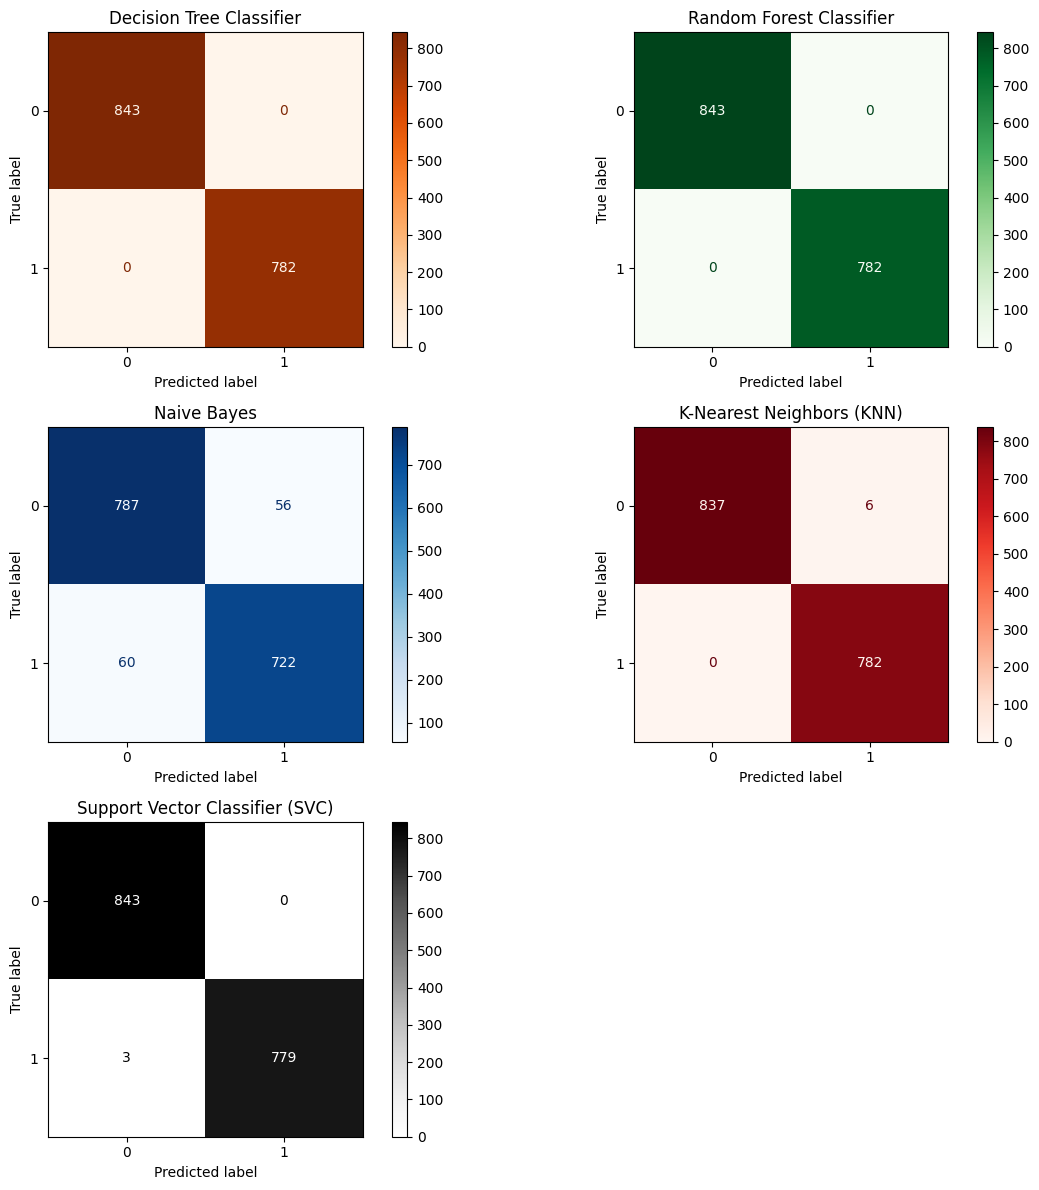

In [37]:
# Creating confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)
svc_cm = confusion_matrix(y_test, svc_predictions)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Plotting each confusion matrix
ConfusionMatrixDisplay(dt_cm, display_labels=dt_clf.classes_).plot(ax=axes[0], cmap="Oranges")
axes[0].set_title("Decision Tree Classifier")

ConfusionMatrixDisplay(rf_cm, display_labels=rf_clf.classes_).plot(ax=axes[1], cmap="Greens")
axes[1].set_title("Random Forest Classifier")

ConfusionMatrixDisplay(nb_cm, display_labels=nb_clf.classes_).plot(ax=axes[2], cmap="Blues")
axes[2].set_title("Naive Bayes")

ConfusionMatrixDisplay(knn_cm, display_labels=knn_clf.classes_).plot(ax=axes[3], cmap="Reds")
axes[3].set_title("K-Nearest Neighbors (KNN)")

ConfusionMatrixDisplay(svc_cm, display_labels=svc_clf.classes_).plot(ax=axes[4], cmap="Greys")
axes[4].set_title("Support Vector Classifier (SVC)")

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

- After comparing the performance of five classification models using accuracy, precision, recall, and F1 score, we can draw these conclusions:
    - Decision Tree and Random Forest models got 100% on all the metrics. It usually means these two models have memorized the training data instead of learning general patterns. This is called overfitting. This leads to models not working well on new or real-world data. Because of this, we will not consider Decision Tree and Random Forest when choosing the best model. Therefore, not suitable for deployment without further regularization or validation.
    - Now comparing Naive Bayes, K-Nearest Neighbors and Support Vector Classifier, Support Vector Classifier (SVC) achieved the best overall balance with 99.82% accuracy, 100% precision, 99.62% recall, and 99.81% F1 score. 

- On comparison of Confusion Matrix we draw following conclusions:
    - `Naive Bayes`
        - It correctly predicted 787 poisonous mushrooms.
        - It incorrectly predicted 56 poisonous mushrooms as edible mushrooms.
        - It incorrectly predicted 60 edible mushrooms as poisonous mushrooms.
        - It correctly predicted 722 edible mushrooms.
    - `KNN`
        - It correctly predicted 837 poisonous mushrooms.
        - It incorrectly predicted 6 poisonous mushrooms as edible mushrooms.
        - It incorrectly predicted 0 edible mushrooms as poisonous mushrooms.
        - It correctly predicted 782 edible mushrooms.
    - `SVC`
        - It correctly predicted 843 poisonous mushrooms.
        - It incorrectly predicted 0 poisonous mushrooms as edible mushrooms.
        - It incorrectly predicted 3 edible mushrooms as poisonous mushrooms.
        - It correctly predicted 779 edible mushrooms.

### Feature Selection using `Support Vector Classifier (SVC)`

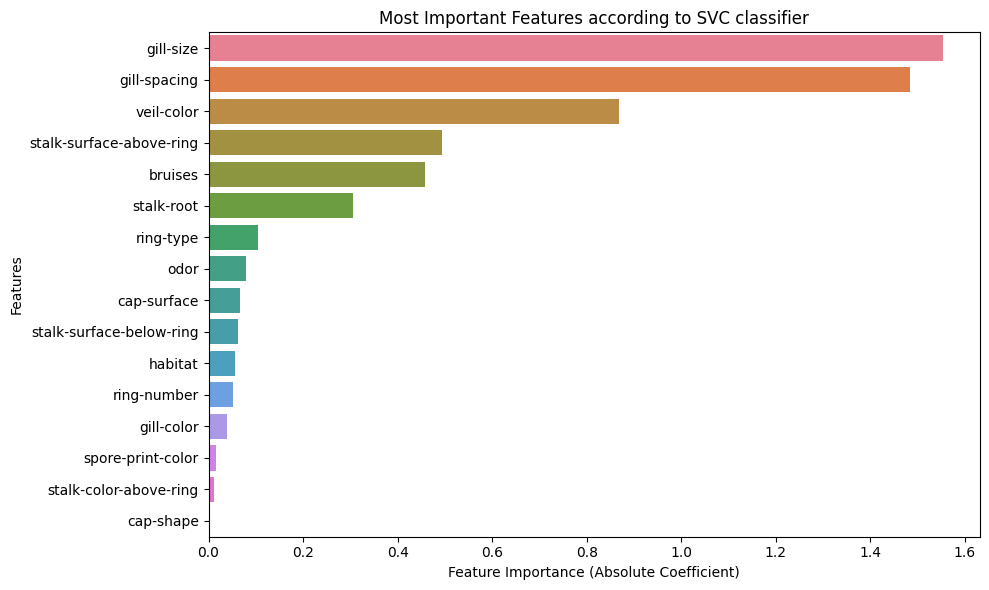

In [38]:
svc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=5000)
svc.fit(X_train, y_train)

model = SelectFromModel(svc, prefit=True)
selected_features = X.columns[model.get_support()]
selected_coefs = np.abs(svc.coef_[0][model.get_support()])

importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": selected_coefs
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, hue="Feature", dodge=False, legend=False)
plt.title("Most Important Features according to SVC classifier")
plt.xlabel("Feature Importance (Absolute Coefficient)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

- According to the SVC model, the top features that contribute to a mushroom being poisonous are its gill-size, gill-spacing, veil-color, stalk-surface-above-ring and bruises.
- To conclude this analysis, if I were exploring mushrooms in the forest and had an algorithm to help me determine whether a mushroom is poisonous or edible, I would rely on the Support Vector Classifier (SVC) model. I would pay close attention to key mushroom features : 
    - gill size
    - gill spacing
    - veil color
    - stalk surface above the ring
    - bruises
- These features were found to be the most influential in determining whether a mushroom is poisonous or edible.

Therefore, SVC performed the best among other model that is why it is the most suitable model for deployment and it should be used to classify this dataset.